<a href="https://colab.research.google.com/github/JuanManiglia/Guia_Tensorflow_Keras/Clase_06/clase_06_1_python_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modulo 6 : Aplicaciones de las Redes Neuronales Profundas**
* Instructor: [Juan Maniglia](https://juanmaniglia.github.io)

# Parte 6.1: Procesamiento de imágenes en Python

Haremos uso de imágenes para demostrar codificadores automáticos. Para usar imágenes en Python, haremos uso del paquete Pillow. El siguiente programa usa Pillow para cargar y mostrar una imagen.

[[[199 213 240]
  [200 214 240]
  [200 214 240]
  ...
  [ 86  34  96]
  [ 48   4  57]
  [ 57  21  65]]

 [[199 213 239]
  [200 214 240]
  [200 214 240]
  ...
  [215 215 251]
  [252 242 255]
  [237 218 250]]

 [[200 214 240]
  [200 214 240]
  [201 215 241]
  ...
  [227 238 255]
  [167 180 197]
  [ 61  79  91]]

 ...

 [[136 112 108]
  [137 113 109]
  [140 116 112]
  ...
  [ 85  84  63]
  [ 91  90  69]
  [ 93  92  72]]

 [[119  90  84]
  [118  89  83]
  [119  90  84]
  ...
  [ 86  84  61]
  [ 89  87  64]
  [ 90  88  65]]

 [[129  96  89]
  [129  96  89]
  [131  98  91]
  ...
  [ 86  82  57]
  [ 89  85  60]
  [ 89  85  60]]]


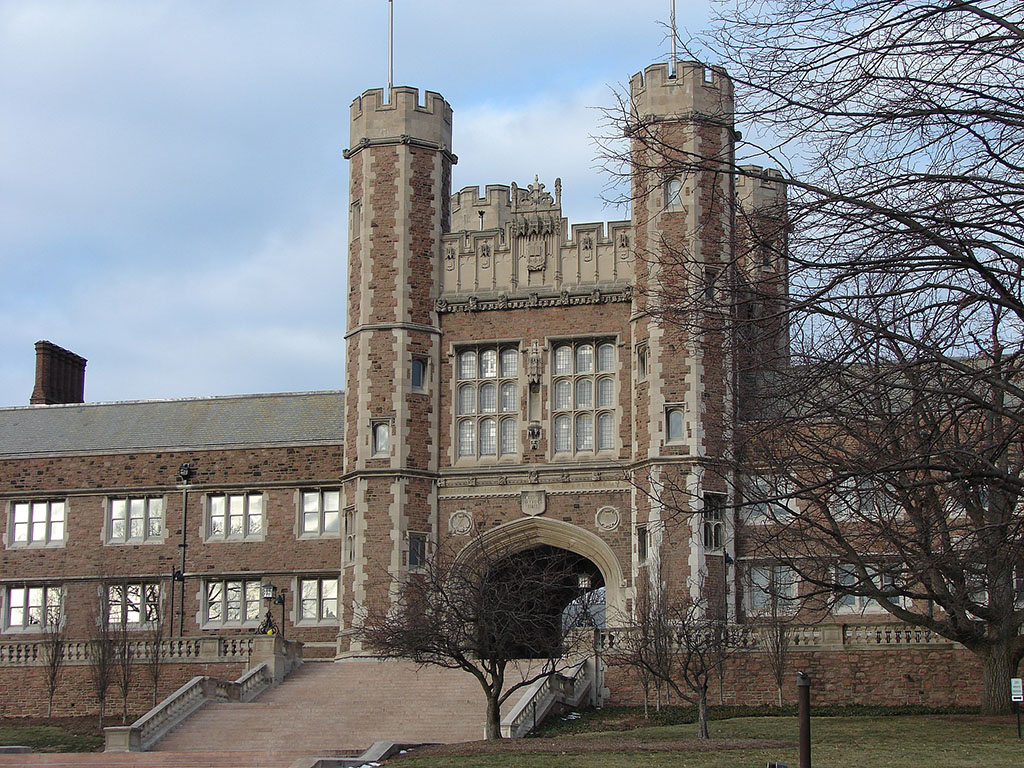

In [1]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

%matplotlib inline

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
img = Image.open(BytesIO(response.content))
img.load()

print(np.asarray(img))

img

### Creación de imágenes (a partir de píxeles) en Python

La almohada también se puede usar para crear una imagen a partir de un cubo numpy 3D. Las filas y columnas especifican los píxeles. La profundidad, de 3, especifica rojo, verde y azul. Aquí se crea una imagen simple.

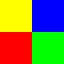

In [2]:
from PIL import Image
import numpy as np

w, h = 64, 64
data = np.zeros((h, w, 3), dtype=np.uint8)

# Yellow
for row in range(32):
    for col in range(32):
        data[row,col] = [255,255,0]
        
# Red
for row in range(32):
    for col in range(32):
        data[row+32,col] = [255,0,0]
        
# Green
for row in range(32):
    for col in range(32):
        data[row+32,col+32] = [0,255,0]        
        
# Blue
for row in range(32):
    for col in range(32):
        data[row,col+32] = [0,0,255]                
        

img = Image.fromarray(data, 'RGB')
img

### Transformar imágenes en Python (a nivel de píxeles)

Podemos combinar los dos últimos programas y modificar imágenes. Aquí tomamos el color medio de cada píxel y formamos una imagen en escala de grises.

Rows: 768, Cols: 1024


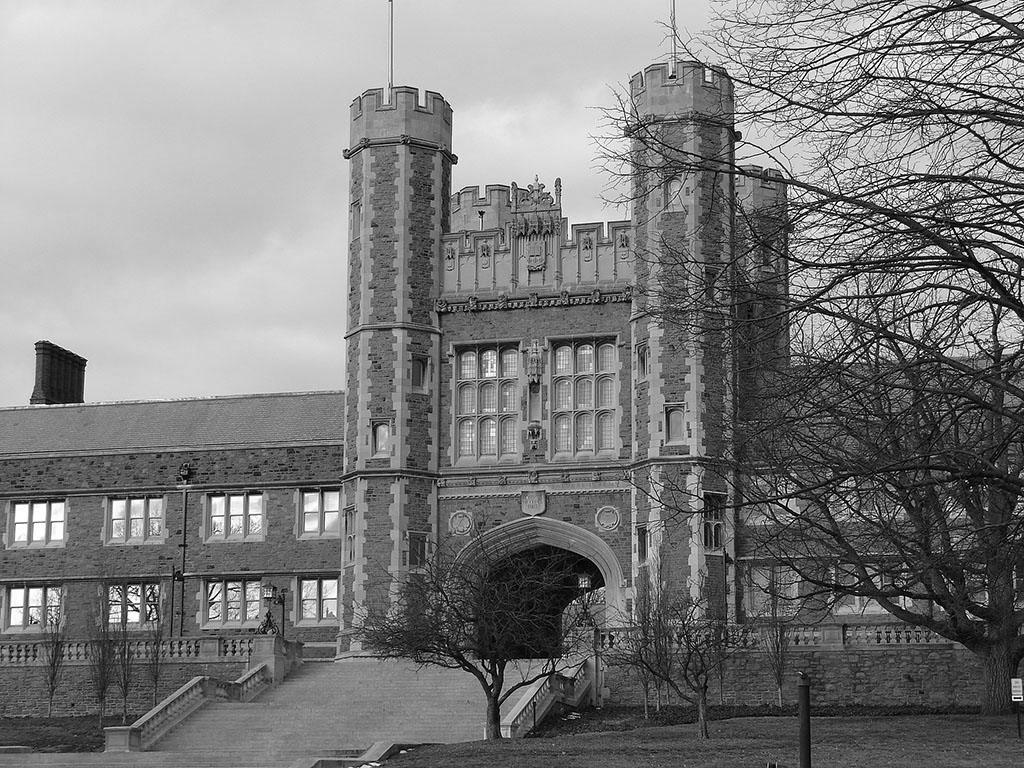

In [3]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"
response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})

img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Crear nueva imagen
img2_array = np.zeros((rows, cols, 3), dtype=np.uint8)
for row in range(rows):
    for col in range(cols):
        t = np.mean(img_array[row,col])
        img2_array[row,col] = [t,t,t]

img2 = Image.fromarray(img2_array, 'RGB')
img2  

# Estandarizar imágenes

Cuando se procesan varias imágenes juntas, a veces es importante estandarizarlas. El siguiente código lee una secuencia de imágenes y hace que todas sean del mismo tamaño y perfectamente cuadradas. Si las imágenes de entrada no son cuadradas, se producirá un recorte.

https://data.heatonresearch.com/images/jupyter/brookings.jpeg


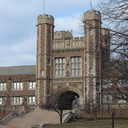

https://data.heatonresearch.com/images/jupyter/SeigleHall.jpeg


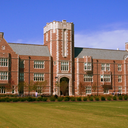

https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg


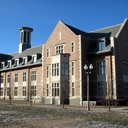

(3, 49152)


In [7]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

images = [
  "https://data.heatonresearch.com/images/jupyter/brookings.jpeg",
  "https://data.heatonresearch.com/images/jupyter/SeigleHall.jpeg",
  "https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg"   
]

def crop_square(image):        
    width, height = image.size
    
    # Recortar la imagen, centrada
    new_width = min(width,height)
    new_height = new_width
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    return image.crop((left, top, right, bottom))
    
x = [] 
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    img = Image.open(BytesIO(response.content))
    img.load()
    img = crop_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)


### Añadir ruido a una imagen

Los codificadores automáticos pueden manejar el ruido. Primero es importante ver cómo agregar ruido a una imagen. Hay muchas maneras de agregar ese ruido. El siguiente código agrega cuadrados negros aleatorios a la imagen para producir ruido.

Rows: 768, Cols: 1024
(768, 1024, 3)


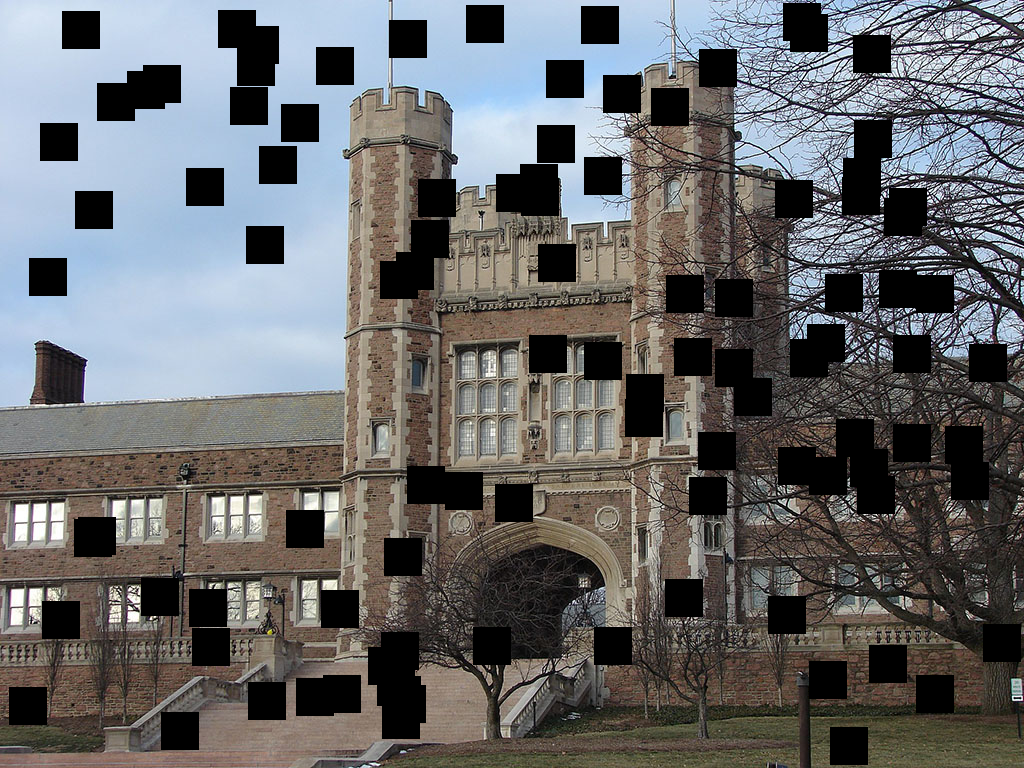

In [5]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline


def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/20) # el tamaño del punto es 1/20 de la dimensión más pequeña
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Crear nueva imagen
img2_array = img_array.astype(np.uint8)
print(img2_array.shape)
img2_array = add_noise(img2_array)
img2 = Image.fromarray(img2_array, 'RGB')
img2        
        

## Descarga de ZIP y Extracción de múltiples imágenes.

In [1]:
import os
import wget
from zipfile import ZipFile

DOWNLOAD_SOURCE = "https://github.com/jeffheaton/data-mirror/releases/download/v1/paperclips.zip"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]


PATH = R"C:\Users\jamr1\temp"
EXTRACT_TARGET = os.path.join(PATH,"clips")
SOURCE = os.path.join(PATH, "clips")
TARGET = os.path.join(PATH,"clips-processed")

In [ ]:
# wget.download(DOWNLOAD_SOURCE, out=PATH)
# os.makedirs(SOURCE)
os.makedirs(TARGET)
# with ZipFile(PATH +'\\'+ DOWNLOAD_NAME, 'r') as f:
#     f.extractall(SOURCE)

## Procesado de Imágenes

In [8]:
import imageio
import glob
from tqdm import tqdm
from PIL import Image
import os
        
def scale(img, scale_width, scale_height):
    # Escalado de la imagen
    img = img.resize((
        scale_width, 
        scale_height), 
        Image.ANTIALIAS)
            
    return img

def standardize(image):
    rgbimg = Image.new("RGB", image.size)
    rgbimg.paste(image)
    return rgbimg

def fail_below(image, check_width, check_height):
    width, height = image.size
    assert width == check_width
    assert height == check_height    

In [9]:
files = glob.glob(os.path.join(R'C:\Users\jamr1\temp\clips\paperclips\paperclips',"*.jpg"))

for file in tqdm(files):
    try:
        target = ""
        name = os.path.basename(file)
        filename, _ = os.path.splitext(name)
        img = Image.open(file)
        img = standardize(img)
        img = crop_square(img)
        img = scale(img, 128, 128)
        #fail_below(img, 128, 128)

        target = os.path.join(TARGET,filename+".jpg")
        img.save(target, quality=25)
    except KeyboardInterrupt:
        print("Keyboard interrupt")
        break
    except AssertionError:
        print("Assertion")
        break
    except:
        print(f"Unexpected exception while processing image source: {file}, target: {target}" , exc_info=True)

100%|██████████| 25000/25000 [01:02<00:00, 397.19it/s]
